# 📌 Problem Statement:
The objective is to predict whether a loan applicant is likely to be approved for a loan
based on historical data. I will handle missing values, perform exploratory analysis, 
build a predictive model, and evaluate its performance.

In [101]:
# STEP 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set style
sns.set(style='whitegrid')

In [9]:
# STEP 2: Load the Excel file
df = pd.read_csv("train.csv")  # Replace with the exact filename if different

# Preview the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# STEP 3: Check total missing values per column
missing = df.isnull().sum()
print("Missing Values Summary:\n", missing[missing > 0])

# Fill numerical columns with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Confirm no missing values remain
print("\n All missing values handled?")
print(df.isnull().sum().sum() == 0)

Missing Values Summary:
 Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

 All missing values handled?
True


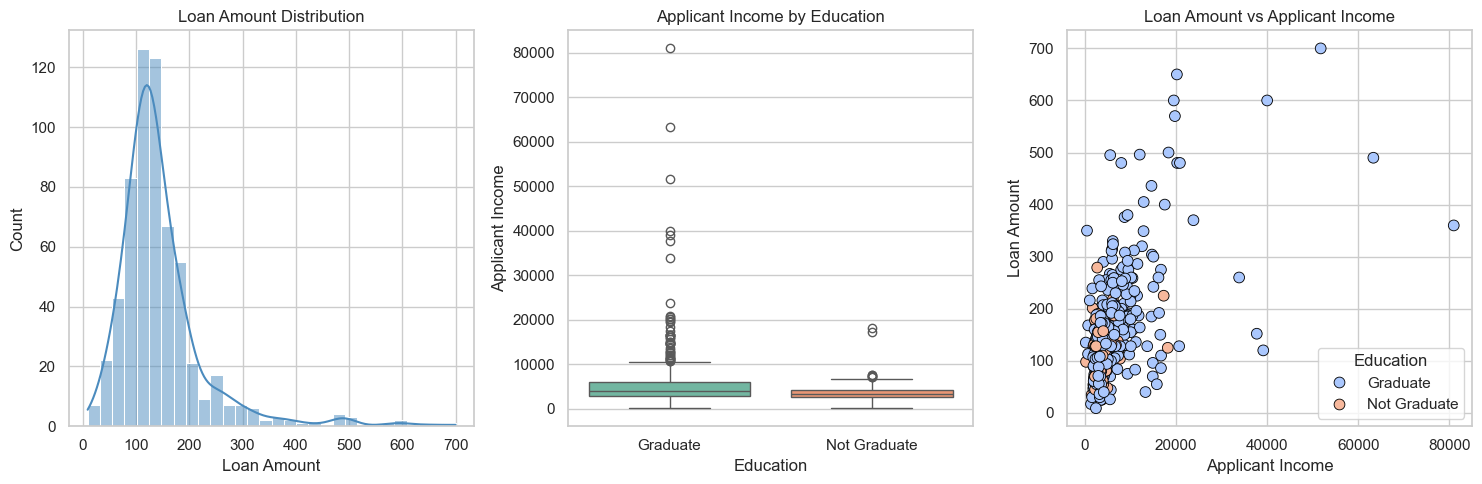

In [7]:
# STEP 4: Exploratory Data Analyss (Visualizing key features as loan amount, educaion and income)

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Set up figure
plt.figure(figsize=(15, 5))

# 1️ Loan Amount Distribution (Histogram)
plt.subplot(1, 3, 1)
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='#4B8BBE')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Count")

# 2️ Applicant Income by Education (Boxplot) — using hue and legend=False
plt.subplot(1, 3, 2)
sns.boxplot(
    data=df,
    x='Education',
    y='ApplicantIncome',
    hue='Education',
    palette='Set2',
    dodge=False,
    legend=False  # Prevents legend from appearing
)
plt.title("Applicant Income by Education")
plt.xlabel("Education")
plt.ylabel("Applicant Income")

# 3️ Scatter plot (Income vs Loan, colored by Education)
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df,
    x='ApplicantIncome',
    y='LoanAmount',
    hue='Education',
    palette='coolwarm',
    s=60,
    edgecolor='black'
)
plt.title("Loan Amount vs Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend(title='Education')

# Final layout adjustment
plt.tight_layout()
plt.show()

In [103]:
# STEP 5: Handling missing values
from sklearn.impute import SimpleImputer

# Use most frequent value to fill missing data
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to the dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [104]:
# STEP 6: Encode categorial columns
from sklearn.preprocessing import LabelEncoder

# Convert text labels to numbers
le = LabelEncoder()

for col in df_imputed.select_dtypes(include='object').columns:
    df_imputed[col] = le.fit_transform(df_imputed[col])

In [105]:
# STEP 7: Define features (X) and target variable (y)

X = df_imputed.drop('Loan_Status', axis=1)
y = df_imputed['Loan_Status']

In [106]:
# STEP 8: Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

🌳 Decision Tree Accuracy: 69.11 %


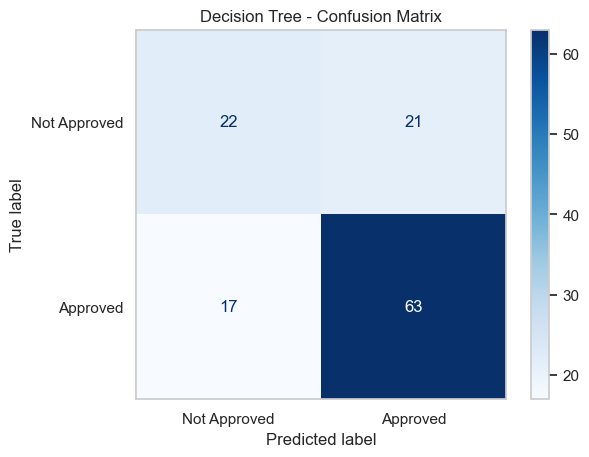

In [116]:
# STEP 9: Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred_tree)
print("🌳 Decision Tree Accuracy:", round(accuracy * 100, 2), "%")

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_tree,
    display_labels=["Not Approved", "Approved"],
    cmap="Blues"
)
plt.title("Decision Tree - Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
# Conclusion 

The Decision Tree model achieved an accuracy of 69%, which indicates moderate performance.
This means the model correctly predicts about 7 out of 10 loan approval outcomes.

Insights:
- Feature analysis revealed that loan amount, income, and education status played key roles.
- However, the relatively low accuracy suggests the model may be underfitting or the dataset has limited predictive patterns.
- Future improvements could involve feature engineering, using ensemble models (e.g., Random Forest), or hyperparameter tuning.

Recommendation:
To improve results, consider cleaning missing values more deeply, adding more relevant features, or applying advanced algorithms.